# Mahdy , Vatankhahan , 2072069



# DNN: analysis with Keras of 2D data , Part 1

## Importing Needed Libraries 

In [5]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib as mpl
mpl.rc('image'  , cmap = 'copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py


# training data
perc_train = 0.8

## Load and Plot the Data and Build Traing Set

2
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

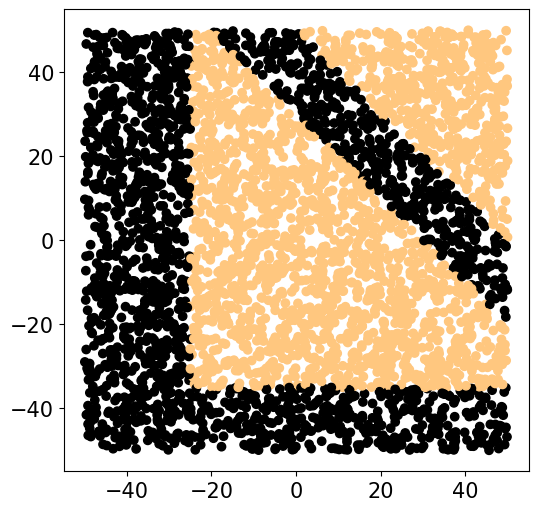

In [9]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
j = 0
x = np.loadtxt(filename("data"+f'{j}',TYPE), delimiter=' ')
y = np.loadtxt(filename("labels"+f'{j}',TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

# for i in range(10):
#     print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [7]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [8]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [ ]:
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

def create_DNN(activation, n_hidden_layers):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=activation))
    
    for i in range(n_hidden_layers):
        model.add(Dense(20,activation=activation))   # 20 cells in each hidden layer
    
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    return model


def model_compiler(optimizer ,activation, n_hidden_layers):
    model = create_DNN(activation, n_hidden_layers)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

### GridSearch for parameters (<font color='red'>Optimizer</font> , <font color='blue'>Activation</font> and also <font color='green'>Few Number of Hidden Layers</font>)  and  Fit Traning for the best model

<b>we included all the results of the run in order not to run the cell again and used the results (for best parameters) in the next cell by their actual name</b>



In [ ]:
# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'Adam' , 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']

# list of allowed optional arguments for the Activation Function
activation = ['relu', 'elu', 'tanh', 'sigmoid']

# List for Few deifferent number of hidden layers (otherwise the runnig time would get so much longer)
n_hidden_layers = [3,4]

# training parameters
batch_size = 64
epochs = 10

# GS estimator
model_gridsearch = KerasClassifier(
                        build_fn=model_compiler, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        verbose=1
                    )


param_grid = dict(optimizer = optimizer , activation = activation , n_hidden_layers = n_hidden_layers )

# call scikit grid search module
# grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4 , verbose = 4)  # Using 4_Cross_Validation
# grid_result = grid.fit(x_train,y_train)

# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))





# Best: 0.806562 using {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'RMSprop'}
# 0.625625 (0.060081) with: {'activation': 'relu', 'n_hidden_layers': 3, 'optimizer': 'SGD'}
# 0.778125 (0.059520) with: {'activation': 'relu', 'n_hidden_layers': 3, 'optimizer': 'Adam'}
# 0.754688 (0.012574) with: {'activation': 'relu', 'n_hidden_layers': 3, 'optimizer': 'RMSprop'}
# 0.609375 (0.070215) with: {'activation': 'relu', 'n_hidden_layers': 3, 'optimizer': 'Adagrad'}
# 0.457812 (0.080765) with: {'activation': 'relu', 'n_hidden_layers': 3, 'optimizer': 'Adadelta'}
# 0.677813 (0.040130) with: {'activation': 'relu', 'n_hidden_layers': 3, 'optimizer': 'Adamax'}
# 0.774687 (0.044091) with: {'activation': 'relu', 'n_hidden_layers': 3, 'optimizer': 'Nadam'}
# 0.549375 (0.063434) with: {'activation': 'relu', 'n_hidden_layers': 4, 'optimizer': 'SGD'}
# 0.799375 (0.060502) with: {'activation': 'relu', 'n_hidden_layers': 4, 'optimizer': 'Adam'}
# 0.763750 (0.064741) with: {'activation': 'relu', 'n_hidden_layers': 4, 'optimizer': 'RMSprop'}
# 0.569062 (0.069694) with: {'activation': 'relu', 'n_hidden_layers': 4, 'optimizer': 'Adagrad'}
# 0.528125 (0.029797) with: {'activation': 'relu', 'n_hidden_layers': 4, 'optimizer': 'Adadelta'}
# 0.731250 (0.064159) with: {'activation': 'relu', 'n_hidden_layers': 4, 'optimizer': 'Adamax'}
# 0.754375 (0.019050) with: {'activation': 'relu', 'n_hidden_layers': 4, 'optimizer': 'Nadam'}
# 0.685312 (0.018122) with: {'activation': 'elu', 'n_hidden_layers': 3, 'optimizer': 'SGD'}
# 0.753125 (0.046288) with: {'activation': 'elu', 'n_hidden_layers': 3, 'optimizer': 'Adam'}
# 0.764688 (0.016709) with: {'activation': 'elu', 'n_hidden_layers': 3, 'optimizer': 'RMSprop'}
# 0.609063 (0.087162) with: {'activation': 'elu', 'n_hidden_layers': 3, 'optimizer': 'Adagrad'}
# 0.587500 (0.056506) with: {'activation': 'elu', 'n_hidden_layers': 3, 'optimizer': 'Adadelta'}
# 0.704375 (0.025868) with: {'activation': 'elu', 'n_hidden_layers': 3, 'optimizer': 'Adamax'}
# 0.765313 (0.023641) with: {'activation': 'elu', 'n_hidden_layers': 3, 'optimizer': 'Nadam'}
# 0.660937 (0.046665) with: {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'SGD'}
# 0.789687 (0.024517) with: {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'Adam'}
# 0.806562 (0.018400) with: {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'RMSprop'}
# 0.645000 (0.016512) with: {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'Adagrad'}
# 0.491250 (0.101269) with: {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'Adadelta'}
# 0.741875 (0.030689) with: {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'Adamax'}
# 0.803750 (0.032680) with: {'activation': 'elu', 'n_hidden_layers': 4, 'optimizer': 'Nadam'}
# 0.653438 (0.036243) with: {'activation': 'tanh', 'n_hidden_layers': 3, 'optimizer': 'SGD'}
# 0.752500 (0.040418) with: {'activation': 'tanh', 'n_hidden_layers': 3, 'optimizer': 'Adam'}
# 0.735938 (0.010946) with: {'activation': 'tanh', 'n_hidden_layers': 3, 'optimizer': 'RMSprop'}
# 0.676250 (0.009803) with: {'activation': 'tanh', 'n_hidden_layers': 3, 'optimizer': 'Adagrad'}
# 0.556250 (0.092098) with: {'activation': 'tanh', 'n_hidden_layers': 3, 'optimizer': 'Adadelta'}
# 0.690937 (0.015088) with: {'activation': 'tanh', 'n_hidden_layers': 3, 'optimizer': 'Adamax'}
# 0.733750 (0.018307) with: {'activation': 'tanh', 'n_hidden_layers': 3, 'optimizer': 'Nadam'}
# 0.682187 (0.016355) with: {'activation': 'tanh', 'n_hidden_layers': 4, 'optimizer': 'SGD'}
# 0.755625 (0.011541) with: {'activation': 'tanh', 'n_hidden_layers': 4, 'optimizer': 'Adam'}
# 0.761875 (0.012167) with: {'activation': 'tanh', 'n_hidden_layers': 4, 'optimizer': 'RMSprop'}
# 0.657187 (0.033206) with: {'activation': 'tanh', 'n_hidden_layers': 4, 'optimizer': 'Adagrad'}
# 0.530313 (0.060476) with: {'activation': 'tanh', 'n_hidden_layers': 4, 'optimizer': 'Adadelta'}
# 0.713750 (0.006374) with: {'activation': 'tanh', 'n_hidden_layers': 4, 'optimizer': 'Adamax'}
# 0.750313 (0.012323) with: {'activation': 'tanh', 'n_hidden_layers': 4, 'optimizer': 'Nadam'}
# 0.517500 (0.016081) with: {'activation': 'sigmoid', 'n_hidden_layers': 3, 'optimizer': 'SGD'}
# 0.588125 (0.093752) with: {'activation': 'sigmoid', 'n_hidden_layers': 3, 'optimizer': 'Adam'}
# 0.550313 (0.065014) with: {'activation': 'sigmoid', 'n_hidden_layers': 3, 'optimizer': 'RMSprop'}
# 0.498750 (0.023734) with: {'activation': 'sigmoid', 'n_hidden_layers': 3, 'optimizer': 'Adagrad'}
# 0.515000 (0.018435) with: {'activation': 'sigmoid', 'n_hidden_layers': 3, 'optimizer': 'Adadelta'}
# 0.517500 (0.016081) with: {'activation': 'sigmoid', 'n_hidden_layers': 3, 'optimizer': 'Adamax'}
# 0.561250 (0.083577) with: {'activation': 'sigmoid', 'n_hidden_layers': 3, 'optimizer': 'Nadam'}
# 0.517500 (0.016081) with: {'activation': 'sigmoid', 'n_hidden_layers': 4, 'optimizer': 'SGD'}
# 0.517500 (0.016081) with: {'activation': 'sigmoid', 'n_hidden_layers': 4, 'optimizer': 'Adam'}
# 0.517500 (0.016081) with: {'activation': 'sigmoid', 'n_hidden_layers': 4, 'optimizer': 'RMSprop'}
# 0.485000 (0.018435) with: {'activation': 'sigmoid', 'n_hidden_layers': 4, 'optimizer': 'Adagrad'}
# 0.515000 (0.018435) with: {'activation': 'sigmoid', 'n_hidden_layers': 4, 'optimizer': 'Adadelta'}
# 0.517500 (0.016081) with: {'activation': 'sigmoid', 'n_hidden_layers': 4, 'optimizer': 'Adamax'}
# 0.536875 (0.042670) with: {'activation': 'sigmoid', 'n_hidden_layers': 4, 'optimizer': 'Nadam'}


## Getting the Best Results

In [ ]:
# grid_result.best_params_

## Building the Fanal Best Model

In [ ]:
# FINAL_MODEL = model_compiler(grid_result.best_params_['optimizer'] ,grid_result.best_params_['activation'], grid_result.best_params_['n_hidden_layers'])
FINAL_MODEL = model_compiler( 'RMSprop','elu',4 )



## Fitting the Data with designated number of Epochs and Batch-size 

In [ ]:
fit = FINAL_MODEL.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)


## Plotting  "Loss" and "Accuracy" per number of "Epochs"

In [ ]:
fig, AX = plt.subplots(1,2,figsize=(14,6))
ax = AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Building the Grid and predict the color for each data point of the grid using our final model

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = FINAL_MODEL.predict(grid_r)

## Plotting the Results 

<b>Since the activation for the last neuron of the DNN model is "sigmoid" function, we here decide to use a mask to concider the points having the number(color) more than 0.5 to our "1"s and below it to be concidered the "0"s in order to get cleaner results (in line **). </b>

In [ ]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
    
fig,AX=plt.subplots(1,3,figsize=(16,5))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0]                      #**
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show


# Now we try increasing and decreasing  the number of Data Points , Part 2

## We modyfied the "generate_data_DNN_2023" NoteBook a little in order to creat other files with different Sizes for this part

In [ ]:
## Load the Data and Build Traing Set

## plotting Loss and Accuracy
fig, AX = plt.subplots(3,2,figsize=(16,16))
fig2,AX2=plt.subplots(3,3,figsize=(15,15))


for j in range(3):
    x = np.loadtxt(filename("data"+f'{j}',TYPE), delimiter=' ')
    y = np.loadtxt(filename("labels"+f'{j}',TYPE), delimiter=' ')
    N = len(x)

    # dim. of a sample
    L = len(x[0])

    N_train = int(perc_train * N)

## Split training and test data

    (x_train, y_train) = (x[0:N_train],y[0:N_train])
    (x_valid, y_valid) = (x[N_train:],y[N_train:])
    print("Train:",len(x_train),"\t Validation:",len(x_valid))
    
## Rescale the Data    
    x_train = Rescale(x_train)
    x_valid = Rescale(x_valid)
    
## Build the same model     
    FINAL_MODEL = model_compiler( 'RMSprop','elu',4 )
    
## Fit the Data    
    fit = FINAL_MODEL.fit(x_train, y_train, epochs = 400, batch_size = 50, validation_data=(x_valid,y_valid), verbose=1)
    
## plotting Loss and Accuracy
    ax = AX[j, 0]
    ax.plot(fit.history['accuracy'],label="train",c="b")
    ax.plot(fit.history['val_accuracy'],label="valid",c="r")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax=AX[j , 1]
    ax.plot(fit.history['loss'],label="train",c="b")
    ax.plot(fit.history['val_loss'],label="valid",c="r")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.legend()
    
## predict the color for each data point of the grid using our final model    
    pred = FINAL_MODEL.predict(grid_r)
    
    
    ax=AX2[j, 0]
    ax.scatter(x[:,0],x[:,1],c=y)
    boundaries()
    ax.set_title("data")
    ax=AX2[j, 1]
    ax.scatter(grid[:,0],grid[:,1],c=pred)
    boundaries()
    ax.set_title("prediction $\\hat y$")
    ax=AX2[j, 2]
    W1=np.where(pred>0.5)[0]                      #**
    ax.scatter(grid[:,0],grid[:,1],c="#000000")
    ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
    boundaries()
    ax.set_title("where $\\hat y > 1/2$")
    plt.show
    
    
    
    
    
    

## As we can see, it is so hard to detect the black point data in between the two lines for lower number of Data (N = 200)

# Augmentation

In [ ]:
j = 3 #Augmented Data of size = 150
x_aug = np.loadtxt(filename("data"+f'{j}',TYPE), delimiter=' ')
y_aug = np.loadtxt(filename("labels"+f'{j}',TYPE), delimiter=' ')   

    

In [ ]:
K= 21

X = np.zeros( (x_aug.shape[0] , x_aug.shape[1] , K))
Y = np.zeros( (x_aug.shape[0] , K))

X[:,:,0] = x_aug
Y[:,0] = y_aug


k = 0
for k in range(K-1):
    
    s = (np.random.random(size = (X.shape[0],X.shape[1]))-0.5)*(k+1)
    temp_x_aug = X[:,:,0] + s
    X[:,:,k+1] = temp_x_aug

    temp_y_aug = np.zeros((temp_x_aug.shape[0],1))

    for i in range(temp_y_aug.shape[0]):
        temp_y_aug[i,0] = f(temp_x_aug[i,:] , TYPE)


    Y[:,k+1] = temp_y_aug[:,0]

    
# Y = Y.reshape(x_aug.shape[0]*K,1) 
# X = X.reshape(y_aug.shape[0]*K,2)

In [ ]:
A = np.zeros((x_aug.shape[0]*K,2))
B = np.zeros(x_aug.shape[0]*K)



A= X[:,:,0]
B = Y[:,0]
for j in range(1,K):
    A = np.concatenate((A,X[:,:,j]) , axis = 0)
    B = np.concatenate((B,Y[:,j]) , axis = 0)
X = A
Y = B
X =  Rescale(X)


In [ ]:
N_aug = X.shape[0]
# dim. of a sample
perc_train_aug = 0.8
N_train_aug = int(perc_train_aug * N_aug)
## Split training and test data
(x_train_aug, y_train_aug) = (X[0:N_train_aug],Y[0:N_train_aug])
(x_valid_aug, y_valid_aug) = (X[N_train_aug:],Y[N_train_aug:])
print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))

In [ ]:
fit = FINAL_MODEL.fit(x_train_aug, y_train_aug,
                      epochs = 400, batch_size = 50,
                      validation_data=(x_valid_aug,y_valid_aug),
                      verbose=2)


In [ ]:
fig, AX = plt.subplots(1,2,figsize=(14,6))
ax = AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.set_title("Augmented")

ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.set_title("Augmented")
ax.legend()

In [ ]:
pred = FINAL_MODEL.predict(grid_r)

In [ ]:
fig,AX=plt.subplots(1,3,figsize=(16,5))
ax=AX[0]
ax.scatter(X[:,0]*50,X[:,1]*50,c=Y)
boundaries()
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0]                      #**
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")

plt.show()